In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [32]:
df = pd.read_csv("Mall_Customers.csv")

In [33]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [34]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [35]:
df.shape

(200, 5)

In [36]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### 3. Perform Below Visualizations.
∙ Univariate Analysis
∙ Bi- Variate Analysis
∙ Multi-Variate Analysis

In [38]:
df.skew()

CustomerID                0.000000
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

In [39]:
df.kurt(axis =0,skipna =True)

CustomerID               -1.200000
Age                      -0.671573
Annual Income (k$)       -0.098487
Spending Score (1-100)   -0.826629
dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

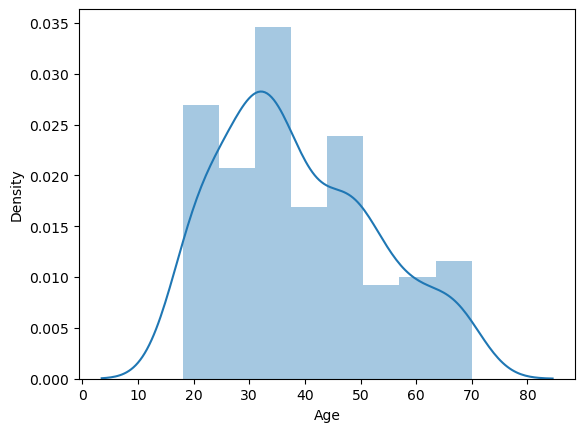

In [40]:
sns.distplot(df.Age)

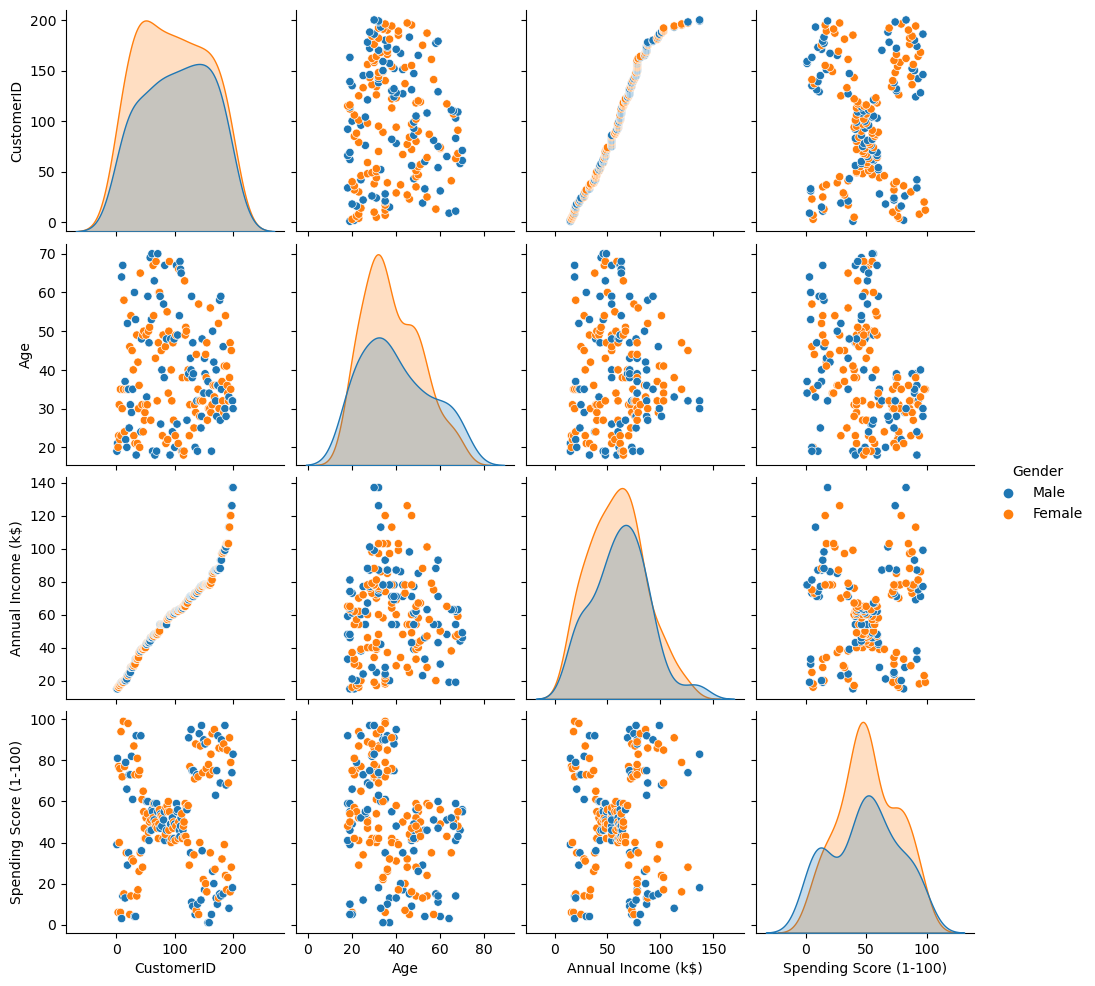

In [41]:
sns.pairplot(df,hue="Gender")

##  Perform descriptive statistics on the dataset

In [42]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [45]:
df.drop(columns=["CustomerID"], axis = 1, inplace = True)

In [46]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [48]:
df.mean()

Age                       38.85
Annual Income (k$)        60.56
Spending Score (1-100)    50.20
dtype: float64

In [49]:
df.median()

Age                       36.0
Annual Income (k$)        61.5
Spending Score (1-100)    50.0
dtype: float64

## Check for Categorical columns and perform encoding.

In [57]:
df["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [61]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [62]:
df["Gender"].replace({"Male":1, "Female":0}, inplace= True)

In [63]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


## Check for Missing values and deal with them.


In [64]:
df.isnull().any()

Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [65]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [66]:
# there is no null value

## Find the outliers and replace them outliers


In [67]:
qnt = df.quantile(q=(0.25,0.75))

In [69]:
qnt

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0.25,0.0,28.75,41.5,34.75
0.75,1.0,49.00,78.0,73.00


In [70]:
#loc is used to acces the row
iqr = qnt.loc[0.75] - qnt.loc[0.25]
iqr

Gender                     1.00
Age                       20.25
Annual Income (k$)        36.50
Spending Score (1-100)    38.25
dtype: float64

In [71]:
upper = qnt.loc[0.75] + 1.5*iqr
upper

Gender                      2.500
Age                        79.375
Annual Income (k$)        132.750
Spending Score (1-100)    130.375
dtype: float64

In [72]:
lower =qnt.loc[0.25] - 1.5*iqr
lower

Gender                    -1.500
Age                       -1.625
Annual Income (k$)       -13.250
Spending Score (1-100)   -22.625
dtype: float64

In [75]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

<AxesSubplot:>

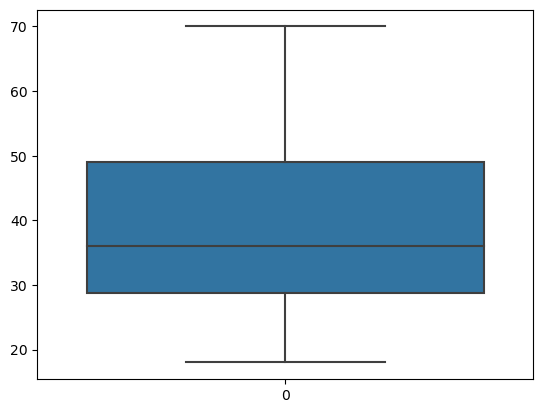

In [77]:
sns.boxplot(df["Age"])

<AxesSubplot:>

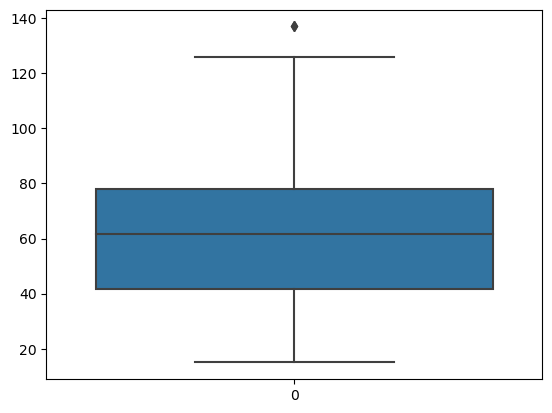

In [84]:
sns.boxplot(df["Annual Income (k$)"])

<AxesSubplot:>

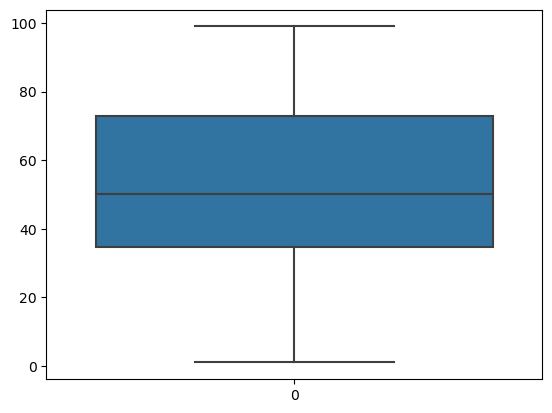

In [83]:
sns.boxplot(df["Spending Score (1-100)"])

## Scaling the data

In [98]:
names = df.columns

In [99]:
from sklearn.preprocessing import MinMaxScaler

In [100]:
scaler =MinMaxScaler()

In [102]:
df = scaler.fit_transform(df)

In [103]:
df

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.        , 0.05102041],
       [0.        , 0.09615385, 0.        , 0.7755102 ],
       [0.        , 0.25      , 0.        , 0.39795918],
       [0.        , 0.07692308, 0.        , 0.76530612],
       [0.        , 0.32692308, 0.        , 0.05102041],
       [0.        , 0.09615385, 0.        , 0.94897959],
       [1.        , 0.88461538, 0.        , 0.02040816],
       [0.        , 0.23076923, 0.        , 0.7244898 ],
       [1.        , 0.94230769, 0.        , 0.13265306],
       [0.        , 0.32692308, 0.        , 1.        ],
       [0.        , 0.76923077, 0.        , 0.14285714],
       [0.        , 0.11538462, 0.        , 0.7755102 ],
       [1.        , 0.36538462, 0.        , 0.12244898],
       [1.        , 0.07692308, 0.        , 0.79591837],
       [0.        , 0.32692308, 0.        , 0.34693878],
       [1.        , 0.03846154,

In [104]:
# convert array into dataframe
df = pd.DataFrame(df,columns = names)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.0,0.387755
1,1.0,0.057692,0.0,0.816327
2,0.0,0.038462,0.0,0.051020
3,0.0,0.096154,0.0,0.775510
4,0.0,0.250000,0.0,0.397959
...,...,...,...,...
195,0.0,0.326923,0.0,0.795918
196,0.0,0.519231,0.0,0.275510
197,1.0,0.269231,0.0,0.744898
198,1.0,0.269231,0.0,0.173469


In [108]:
x = df.iloc[:,:3]
y = df["Spending Score (1-100)"]

In [109]:
x,y

(     Gender       Age  Annual Income (k$)
 0       1.0  0.019231                 0.0
 1       1.0  0.057692                 0.0
 2       0.0  0.038462                 0.0
 3       0.0  0.096154                 0.0
 4       0.0  0.250000                 0.0
 ..      ...       ...                 ...
 195     0.0  0.326923                 0.0
 196     0.0  0.519231                 0.0
 197     1.0  0.269231                 0.0
 198     1.0  0.269231                 0.0
 199     1.0  0.230769                 0.0
 
 [200 rows x 3 columns],
 0      0.387755
 1      0.816327
 2      0.051020
 3      0.775510
 4      0.397959
          ...   
 195    0.795918
 196    0.275510
 197    0.744898
 198    0.173469
 199    0.836735
 Name: Spending Score (1-100), Length: 200, dtype: float64)

In [110]:
#Split the data into training and testing 
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)


In [112]:
x_train.head()

,Gender,Age,Annual Income (k$)
190,0.0,0.307692,0.0
7,0.0,0.096154,0.0
26,0.0,0.519231,0.0
138,1.0,0.019231,0.0
58,0.0,0.173077,0.0


In [113]:
from sklearn.mixture import GaussianMixture


In [114]:
gmm = GaussianMixture(n_components = 5)

In [116]:
gmm.fit(x,y)

GaussianMixture(n_components=5)

In [117]:
pred = gmm.predict(x_test)

In [118]:
pred

array([0, 2, 0, 3, 2, 2, 3, 0, 2, 2, 0, 4, 3, 2, 2, 1, 4, 2, 2, 3, 1, 0,
       3, 2, 4, 2, 1, 3, 2, 0, 2, 2, 1, 3, 2, 4, 0, 3, 1, 1], dtype=int64)